In [23]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import pandas as pd

%matplotlib inline

In [140]:
ALL_DATA = []

In [80]:
NUM_ARMS = 200
NUM_ITERATIONS = 5000
environment = Env(rewards=np.random.randint(10, 20, NUM_ARMS), deviations=np.random.randint(1, 5, NUM_ARMS))

In [81]:
%run BanditLearning.ipynb

YOYOYOYO 200


In [141]:
arms_1 = [2, 5, 10, 50, 100, 250, 500, 1000, 5000, 10000]
for i in range(len(arms_1)):
    print(i)
    environment = Env(rewards=np.random.randint(10, 20, arms_1[i]), deviations=np.random.randint(1, 5, arms_1[i]))
    %run BanditLearning.ipynb
    ALL_DATA.append(ALL_HISTORIES)

0
1
2
3
4
5
6
7
8
9


In [142]:
LEGEND = ['Thompson Sampling', 'Epsilon Greedy', 'UCB', 'UCB Pick/Compare']

for i in range(len(arms_1)):
    for j in range(len(LEGEND)):
        print(LEGEND[j])
        print(ALL_DATA[i][j]['cumulative_regrets'][-1], sum(ALL_DATA[i][j]['cumulative_regrets']))
        print()
    print("--------------------------")

Thompson Sampling
3 14309

Epsilon Greedy
261 656663

UCB
0 0

UCB Pick/Compare
0 0

--------------------------
Thompson Sampling
36 179895

Epsilon Greedy
2771 7262553

UCB
6 29982

UCB Pick/Compare
20000 50010000

--------------------------
Thompson Sampling
46 228426

Epsilon Greedy
1900 4997958

UCB
35 167710

UCB Pick/Compare
46 218807

--------------------------
Thompson Sampling
378 1724618

Epsilon Greedy
1965 5130817

UCB
197 792040

UCB Pick/Compare
361 1639303

--------------------------
Thompson Sampling
747 3413022

Epsilon Greedy
2487 6754433

UCB
358 1501220

UCB Pick/Compare
968 3706552

--------------------------
Thompson Sampling
1792 8081381

Epsilon Greedy
2559 6361474

UCB
711 2639959

UCB Pick/Compare
1715 6765956

--------------------------
Thompson Sampling
3229 13894723

Epsilon Greedy
2825 7607274

UCB
1352 4786120

UCB Pick/Compare
2775 10018231

--------------------------
Thompson Sampling
6035 24470419

Epsilon Greedy
2619 6708783

UCB
2139 7216720

UCB Pic

10 4 [14309, 656663, 0, 0]
[14309, 656663, 0, 0]
[179895, 7262553, 29982, 50010000]
[228426, 4997958, 167710, 218807]
[1724618, 5130817, 792040, 1639303]


c:\users\rishi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


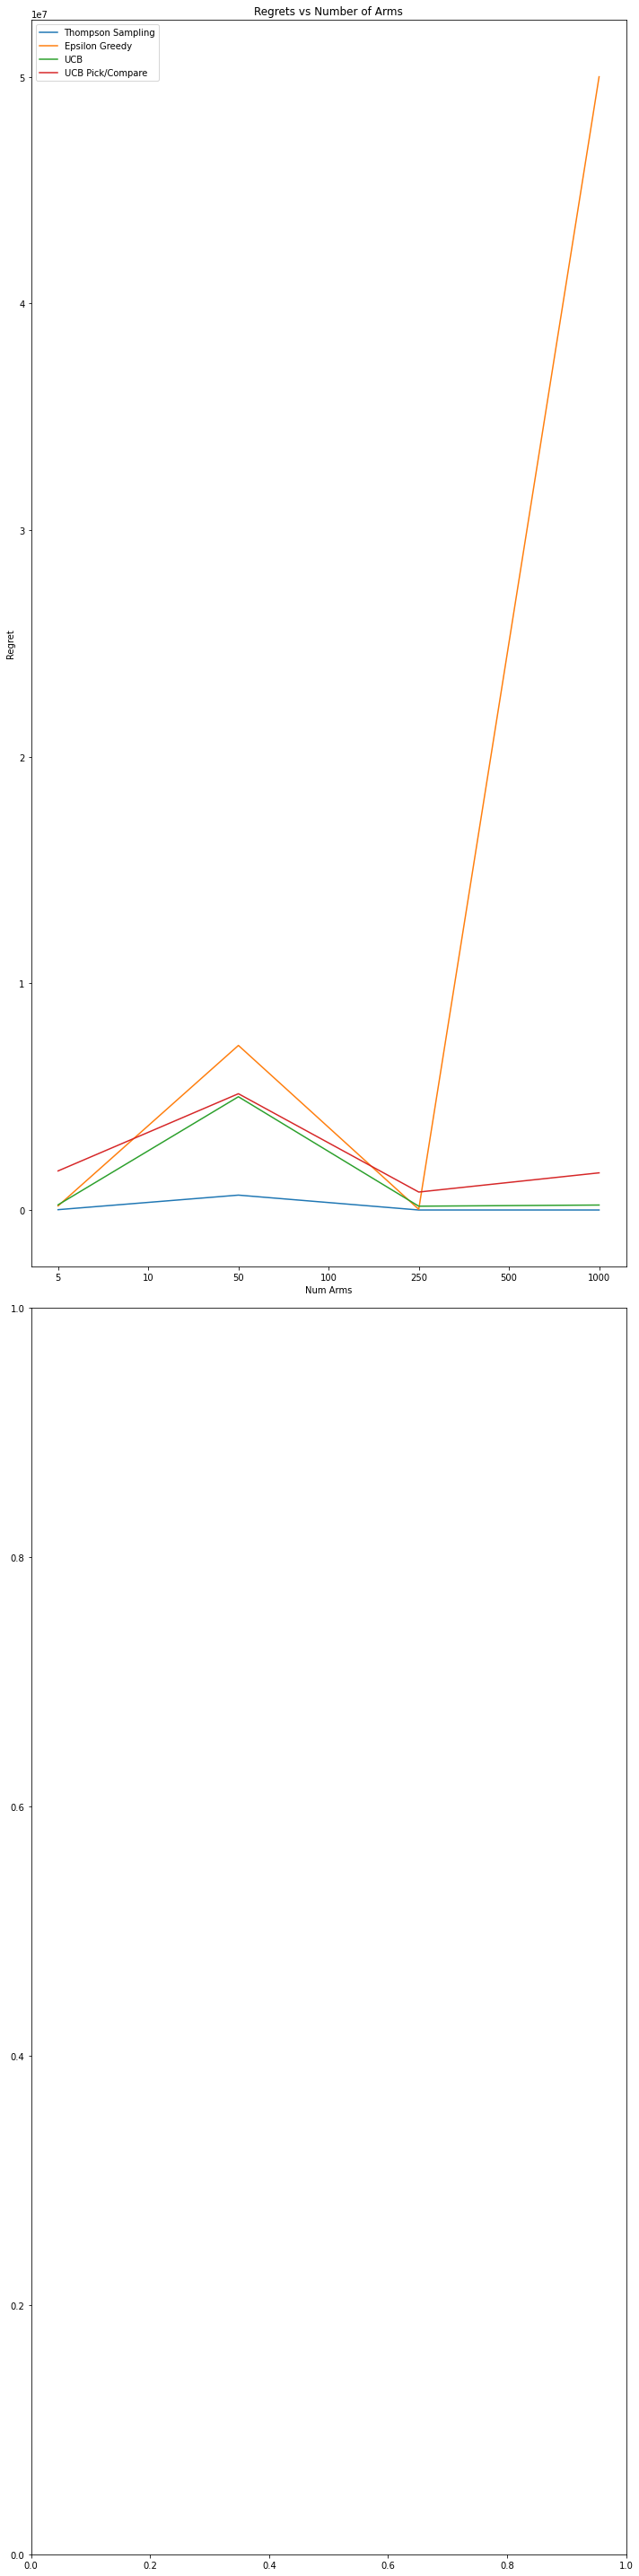

In [143]:
def plot_stuff_more():
    fig, axs = plt.subplots(2, 1, figsize=[10, 40])
    LEGEND = ['Thompson Sampling', 'Epsilon Greedy', 'UCB', 'UCB Pick/Compare']

    # 2D array - [model][idx]
    regs = []
    for i in range(len(arms_1)):
        temp = []
        for j in range(len(LEGEND)):
            temp.append(sum(ALL_DATA[i][j]['cumulative_regrets']))
        regs.append(temp)
    
    print(len(regs), len(regs[0]), regs[0])

    for i in range(len(LEGEND)):
        axs[0].plot(regs[i])
        print(regs[i])
        axs[0].set_title("Regrets vs Number of Arms")
        axs[0].set_xlabel("Num Arms")
        axs[0].set_xticklabels(arms_1)
        axs[0].set_ylabel("Regret")
        axs[0].legend(LEGEND, loc='upper left')
    
    fig.tight_layout()
    #plt.legend(['Thompson Sampling', 'Epsilon Greedy', 'UCB', 'UCB Pick/Compare'], loc='upper left')

plot_stuff_more()

In [9]:
# Random Agent
def RA_run():
    random_agent = RandomAgent(env=environment, max_iterations=NUM_ITERATIONS)
    RA_history = random_agent.act()
    
    res = {"method": "RA", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(RA_history['rewards']), "time (ms)": RA_history['time']}
    
    return res
    
    # print(f"TOTAL REWARD : {sum(RA_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {RA_history['time']}")

    # plot_history(RA_history)

In [10]:
# Thompson Sampling
def TS_run():
    TS_history = TS_act(environment=environment, max_iterations=NUM_ITERATIONS)
    
    res = {"method": "TS", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(TS_history['rewards']), "time (ms)": TS_history['time']}
    
    return res
    
    # print(f"TOTAL REWARD : {sum(TS_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {TS_history['time']}")

    # plot_history(TS_history)

In [11]:
# Epsilon Greedy
def EG_run():
    epsilon_greedy_agent = EpsilonGreedyAgent(env=environment, max_iterations=NUM_ITERATIONS, epsilon=0.1)
    EG_history = epsilon_greedy_agent.act()
    
    res = {"method": "EG", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(EG_history['rewards']), "time (ms)": EG_history['time']}
    
    return res
    
    # print(f"TOTAL REWARD : {sum(EG_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {EG_history['time']}")

    # plot_history(EG_history)

In [12]:
# Upper Confidence Bound
def UCB_run():
    UCB_agent = UpperConfidenceBoundAgent(env=environment, max_iterations=NUM_ITERATIONS)
    UCB_history = UCB_agent.act()
    
    res = {"method": "UCB", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(UCB_history['rewards']), "time (ms)": UCB_history['time']}
    
    return res

    # print(f"TOTAL REWARD : {sum(UCB_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {UCB_history['time']}")

    # plot_history(UCB_history)

In [13]:
# UCB Pick and Compare
def UCB_PC_run():
    UCB_PC_agent = UCB_PickAndCompareAgent(env=environment, max_iterations=NUM_ITERATIONS)
    UCB_PC_history = UCB_PC_agent.act()
    
    res = {"method": "UCB_PC", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(UCB_PC_history['rewards']), "time (ms)": UCB_PC_history['time']}
    
    return res

    # print(f"TOTAL REWARD : {sum(UCB_PC_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {UCB_PC_history['time']}")

    # plot_history(UCB_PC_history)

In [151]:
results = pd.DataFrame()

In [152]:
results = results.append(RA_run(), ignore_index=True)
results = results.append(TS_run(), ignore_index=True)
results = results.append(EG_run(), ignore_index=True)
results = results.append(UCB_run(), ignore_index=True)
results = results.append(UCB_PC_run(), ignore_index=True)

In [153]:
results.head()

,method,iterations,arms (k),reward,time (ms)
0,RA,500.0,5.0,6885.914601,15.998
1,TS,500.0,5.0,9003.298273,16.032
2,EG,500.0,5.0,8717.917249,9.029
3,UCB,500.0,5.0,8995.681391,13.998
4,UCB_PC,500.0,5.0,8956.555415,16.040


In [154]:
arm_arr = [1, 10, 100, 1000, 5000, 10000]
iter_arr = [100, 500, 1000, 2000, 5000, 10000]

for i in range(len(arm_arr)):
    for j in range(len(iter_arr)):
        NUM_ARMS = arm_arr[i]
        NUM_ITERATIONS = iter_arr[j]
        
        environment = Env(rewards=np.random.randint(1, 25, NUM_ARMS), deviations=np.random.randint(1, 5, NUM_ARMS))
        
        #print(len(environment.rewards))
        results = results.append(RA_run(), ignore_index=True)
        results = results.append(TS_run(), ignore_index=True)
        results = results.append(EG_run(), ignore_index=True)
        results = results.append(UCB_run(), ignore_index=True)
        results = results.append(UCB_PC_run(), ignore_index=True)

In [158]:
results

,method,iterations,arms (k),reward,time (ms)
0,RA,500.0,5.0,6885.914601,15.998
1,TS,500.0,5.0,9003.298273,16.032
2,EG,500.0,5.0,8717.917249,9.029
3,UCB,500.0,5.0,8995.681391,13.998
4,UCB_PC,500.0,5.0,8956.555415,16.040
...,...,...,...,...,...
180,RA,10000.0,10000.0,124745.117736,1029.031
181,TS,10000.0,10000.0,123509.883787,244798.210
182,EG,10000.0,10000.0,227555.092708,994.030
183,UCB,10000.0,10000.0,232350.895124,232903.466


In [159]:
# results.to_csv('bandit_data.csv')